In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from src.winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

# Damage Dataset

In [3]:
mse_url = "output/ringsranking_mse_sixteen.csv"
rings_url = "output/ringsranking_rings_sixteen.csv"
df_ringsranking_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/ringsranking_mse_thirtytwo.csv"
rings_url = "output/ringsranking_rings_thirtytwo.csv"
df_ringsranking_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829318845239923 (subseq)
Polar Pith Canny(blur otsu) 12.88055458721076 (subseq)


In [4]:
mse_url = "output/pine_mse_sixteen.csv"
rings_url = "output/pine_rings_sixteen.csv"
df_pine_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/pine_mse_thirtytwo.csv"
rings_url = "output/pine_rings_thirtytwo.csv"
df_pine_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888455438324574 (peaks)
Polar Pith Canny(blur triangle) 19.591747084408897 (peaks)


In [5]:
mse_url = "output/fur_mse_sixteen.csv"
rings_url = "output/fur_rings_sixteen.csv"
df_fur_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/fur_mse_thirtytwo.csv"
rings_url = "output/fur_rings_thirtytwo.csv"
df_fur_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 13.428984012468806 (peaks)
Polar Pith Canny(blur triangle) 13.688767879960144 (peaks)


In [6]:
mse_url = "output/tracy_mse_sixteen.csv"
rings_url = "output/tracy_rings_sixteen.csv"
df_tracy_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/tracy_mse_thirtytwo.csv"
rings_url = "output/tracy_rings_thirtytwo.csv"
df_tracy_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Canny(triangle) 39.683736416974455 (peaks)
Polar Pith Canny(triangle) 39.48914666858598 (peaks)


In [7]:
mse_url = "output/data_mse_sixteen.csv"
rings_url = "output/data_rings_sixteen.csv"
df_data_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/data_mse_thirtytwo.csv"
rings_url = "output/data_rings_thirtytwo.csv"
df_data_thirtytwo = winner_model_rings(mse_url, rings_url)

Canny(triangle) 18.789996216404624 (subseq)
Canny(triangle) 18.871624925897343 (subseq)


In [8]:
#damage
damage_sixteen_url = "damage/damage_sixteen.csv"
damage_thirtytwo_url = "damage/damage_thirtytwo.csv"

#merge
df_merge_sixteen = merge_df(df_ringsranking_sixteen, df_pine_sixteen, df_fur_sixteen, df_tracy_sixteen, df_data_sixteen)
df_merge_thirtytwo = merge_df(df_ringsranking_thirtytwo, df_pine_thirtytwo, df_fur_thirtytwo, df_tracy_thirtytwo, df_data_thirtytwo)

df_damage_sixteen_min_max = read_damage_min_max(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_min_max = read_damage_min_max(damage_thirtytwo_url, df_merge_thirtytwo)

df_damage_sixteen_mean = read_damage_mean(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_mean = read_damage_mean(damage_thirtytwo_url, df_merge_thirtytwo)

In [9]:
#df_damage_sixteen_min_max

In [10]:
#df_damage_thirtytwo_min_max

In [11]:
#df_damage_sixteen_mean

In [12]:
#df_damage_thirtytwo_mean

In [13]:
#STOP

# Config

In [14]:
# initialize the K-Fold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

columns = ['image', 'algo']
training_percent = 0.9

In [15]:
accuracy_sixteen_min_max = []
accuracy_thirtytwo_min_max = []
accuracy_sixteen_mean = []
accuracy_thirtytwo_mean = []

In [16]:
def plot_accuracy(_title, _data):
    models = list(_data.keys())
    performance = list(_data.values())

    fig = plt.figure(figsize = (14, 10))

    plt.bar(models, performance, color ='maroon', width = 0.4)

    plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
    plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
    plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
    plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
    plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
    plt.text(5, performance[5] + 0.01, performance[5], ha='center', fontsize=12)
    plt.text(6, performance[6] + 0.01, performance[6], ha='center', fontsize=12)
    plt.text(7, performance[7] + 0.01, performance[7], ha='center', fontsize=12)
    plt.text(8, performance[8] + 0.01, performance[8], ha='center', fontsize=12)
    plt.text(9, performance[9] + 0.01, performance[9], ha='center', fontsize=12)

    plt.title(_title)
    plt.show()

In [17]:
def heat_map(_cm):
    # plot confusion matrix as heatmap
    
    labels = ['Not Damage', 'Damaged']
    
    # Set up the matplotlib figure
    plt.figure(figsize=(4, 3))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(_cm, annot=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# MinMax

## 16

In [18]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]

# split the data into a holdout set and the rest for K-Fold cross-validation
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=training_percent, random_state=42)

Accuracy on validation set: 0.9777777777777777
Accuracy on validation set: 1.0
Accuracy on validation set: 0.9772727272727273
Mean-Precision: 0.9850168350168351
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



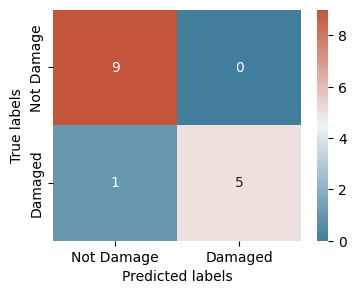

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


In [19]:
# initialize the classifier
logistic_regression = LogisticRegression(solver='liblinear', C=25.0, random_state=0)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_regression.fit(X_train_kf, y_train_kf)
    y_pred_kf = logistic_regression.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = logistic_regression.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



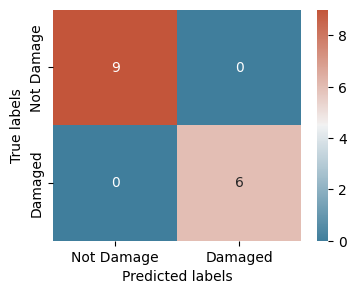

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [20]:
# initialize the classifier
gaussian_nb = GaussianNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    gaussian_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = gaussian_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = gaussian_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7333333333333333
Accuracy on validation set: 0.7045454545454546
Accuracy on validation set: 0.8863636363636364
Mean-Precision: 0.7747474747474747
Accuracy on holdout set: 0.8666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.889     0.889     0.889         9
           1      0.833     0.833     0.833         6

    accuracy                          0.867        15
   macro avg      0.861     0.861     0.861        15
weighted avg      0.867     0.867     0.867        15



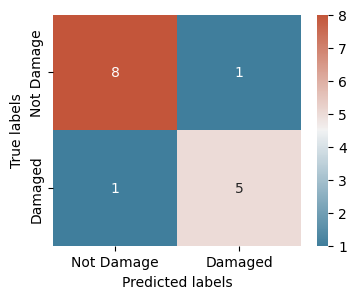

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


In [21]:
# initialize the classifier
multinomial_nb = MultinomialNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    multinomial_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = multinomial_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = multinomial_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.9111111111111111
Accuracy on validation set: 0.8409090909090909
Accuracy on validation set: 0.9545454545454546
Mean-Precision: 0.9021885521885521
Accuracy on holdout set: 0.8

Classification Report:

              precision    recall  f1-score   support

           0      0.750     1.000     0.857         9
           1      1.000     0.500     0.667         6

    accuracy                          0.800        15
   macro avg      0.875     0.750     0.762        15
weighted avg      0.850     0.800     0.781        15



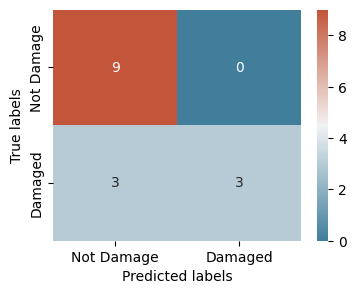

True Positive(TP)  =  3
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  3
Accuracy of the binary classifier = 0.800


In [22]:
# initialize the classifier
lda = LinearDiscriminantAnalysis()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    lda.fit(X_train_kf, y_train_kf)
    y_pred_kf = lda.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = lda.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8666666666666667
Accuracy on validation set: 0.8409090909090909
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.8797979797979797
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



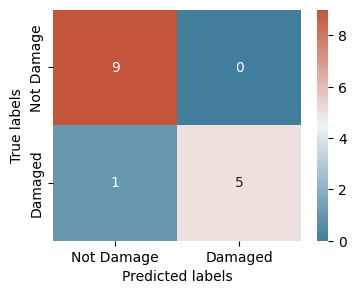

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


In [23]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=1)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8222222222222222
Accuracy on validation set: 0.7954545454545454
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.8498316498316498
Accuracy on holdout set: 0.8666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.818     1.000     0.900         9
           1      1.000     0.667     0.800         6

    accuracy                          0.867        15
   macro avg      0.909     0.833     0.850        15
weighted avg      0.891     0.867     0.860        15



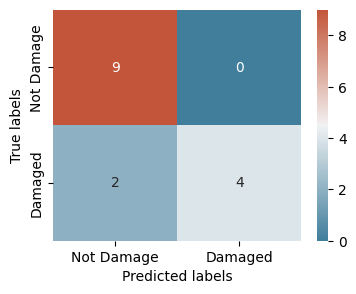

True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  2
Accuracy of the binary classifier = 0.867


In [24]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=2)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.9111111111111111
Accuracy on validation set: 0.8181818181818182
Accuracy on validation set: 0.9545454545454546
Mean-Precision: 0.8946127946127946
Accuracy on holdout set: 0.8666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.889     0.889     0.889         9
           1      0.833     0.833     0.833         6

    accuracy                          0.867        15
   macro avg      0.861     0.861     0.861        15
weighted avg      0.867     0.867     0.867        15



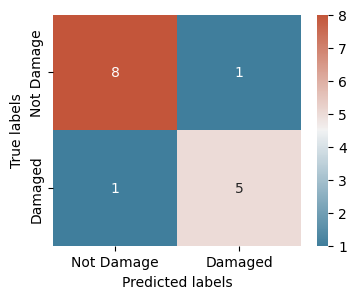

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


In [25]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



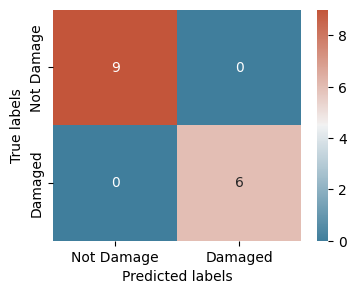

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [26]:
# initialize the classifier
dtc = DecisionTreeClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    dtc.fit(X_train_kf, y_train_kf)
    y_pred_kf = dtc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = dtc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.9333333333333333
Accuracy on validation set: 0.9545454545454546
Accuracy on validation set: 0.9772727272727273
Mean-Precision: 0.955050505050505
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      1.000     0.889     0.941         9
           1      0.857     1.000     0.923         6

    accuracy                          0.933        15
   macro avg      0.929     0.944     0.932        15
weighted avg      0.943     0.933     0.934        15



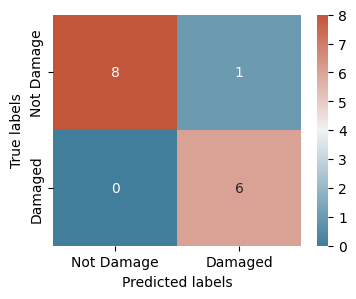

True Positive(TP)  =  6
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  0
Accuracy of the binary classifier = 0.933


In [27]:
# initialize the classifier
rfc = RandomForestClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc.fit(X_train_kf, y_train_kf)
    y_pred_kf = rfc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = rfc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8666666666666667
Accuracy on validation set: 0.9545454545454546
Accuracy on validation set: 0.9772727272727273
Mean-Precision: 0.9328282828282829
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



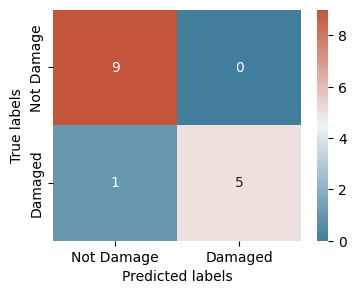

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


In [28]:
# initialize the classifier
svc = SVC(kernel='linear')
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    svc.fit(X_train_kf, y_train_kf)
    y_pred_kf = svc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = svc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

In [29]:
#STOP

## 32

In [30]:
df = df_damage_thirtytwo_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]

# split the data into a holdout set and the rest for K-Fold cross-validation
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=training_percent, random_state=42)

Accuracy on validation set: 0.9333333333333333
Accuracy on validation set: 0.7954545454545454
Accuracy on validation set: 0.9090909090909091
Mean-Precision: 0.8792929292929292
Accuracy on holdout set: 0.8666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.875     0.875     0.875         8
           1      0.857     0.857     0.857         7

    accuracy                          0.867        15
   macro avg      0.866     0.866     0.866        15
weighted avg      0.867     0.867     0.867        15



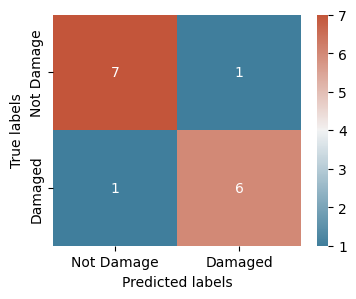

True Positive(TP)  =  6
False Positive(FP) =  1
True Negative(TN)  =  7
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


In [31]:
# initialize the classifier
logistic_regression = LogisticRegression(solver='liblinear', C=25.0, random_state=0)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_regression.fit(X_train_kf, y_train_kf)
    y_pred_kf = logistic_regression.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = logistic_regression.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



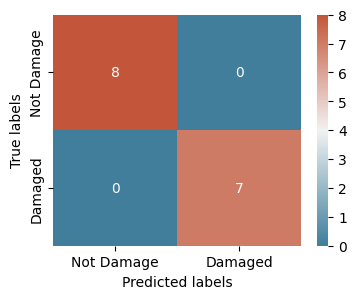

True Positive(TP)  =  7
False Positive(FP) =  0
True Negative(TN)  =  8
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [32]:
# initialize the classifier
gaussian_nb = GaussianNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    gaussian_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = gaussian_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = gaussian_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7777777777777778
Accuracy on validation set: 0.6136363636363636
Accuracy on validation set: 0.7727272727272727
Mean-Precision: 0.7213804713804715
Accuracy on holdout set: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0      0.667     0.750     0.706         8
           1      0.667     0.571     0.615         7

    accuracy                          0.667        15
   macro avg      0.667     0.661     0.661        15
weighted avg      0.667     0.667     0.664        15



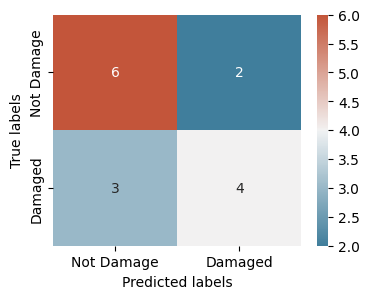

True Positive(TP)  =  4
False Positive(FP) =  2
True Negative(TN)  =  6
False Negative(FN) =  3
Accuracy of the binary classifier = 0.667


In [33]:
# initialize the classifier
multinomial_nb = MultinomialNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    multinomial_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = multinomial_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = multinomial_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7555555555555555
Accuracy on validation set: 0.8636363636363636
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.8503367003367003
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.857     0.923         7

    accuracy                          0.933        15
   macro avg      0.944     0.929     0.932        15
weighted avg      0.941     0.933     0.933        15



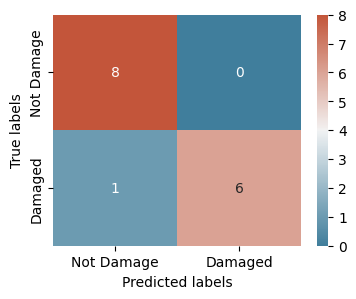

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


In [34]:
# initialize the classifier
lda = LinearDiscriminantAnalysis()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    lda.fit(X_train_kf, y_train_kf)
    y_pred_kf = lda.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = lda.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8666666666666667
Accuracy on validation set: 0.7727272727272727
Accuracy on validation set: 0.9090909090909091
Mean-Precision: 0.8494949494949494
Accuracy on holdout set: 0.8

Classification Report:

              precision    recall  f1-score   support

           0      0.778     0.875     0.824         8
           1      0.833     0.714     0.769         7

    accuracy                          0.800        15
   macro avg      0.806     0.795     0.796        15
weighted avg      0.804     0.800     0.798        15



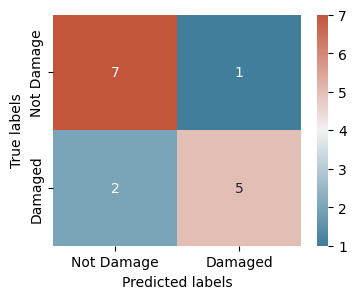

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  7
False Negative(FN) =  2
Accuracy of the binary classifier = 0.800


In [35]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=1)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8222222222222222
Accuracy on validation set: 0.7727272727272727
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.8422558922558921
Accuracy on holdout set: 0.8

Classification Report:

              precision    recall  f1-score   support

           0      0.778     0.875     0.824         8
           1      0.833     0.714     0.769         7

    accuracy                          0.800        15
   macro avg      0.806     0.795     0.796        15
weighted avg      0.804     0.800     0.798        15



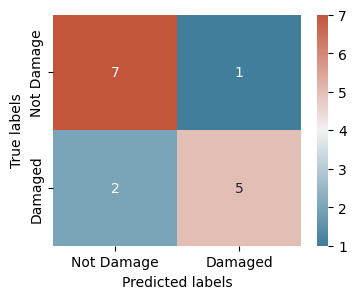

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  7
False Negative(FN) =  2
Accuracy of the binary classifier = 0.800


In [36]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=2)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.8444444444444444
Accuracy on validation set: 0.75
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.8420875420875421
Accuracy on holdout set: 0.8

Classification Report:

              precision    recall  f1-score   support

           0      0.778     0.875     0.824         8
           1      0.833     0.714     0.769         7

    accuracy                          0.800        15
   macro avg      0.806     0.795     0.796        15
weighted avg      0.804     0.800     0.798        15



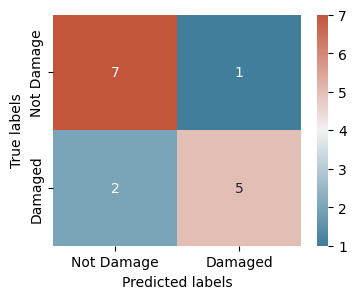

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  7
False Negative(FN) =  2
Accuracy of the binary classifier = 0.800


In [37]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         8
           1      1.000     1.000     1.000         7

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



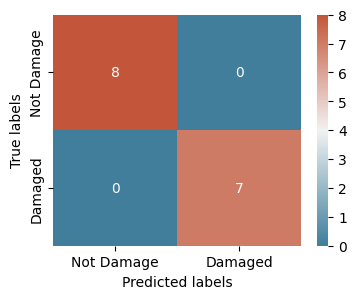

True Positive(TP)  =  7
False Positive(FP) =  0
True Negative(TN)  =  8
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [38]:
# initialize the classifier
dtc = DecisionTreeClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    dtc.fit(X_train_kf, y_train_kf)
    y_pred_kf = dtc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = dtc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.9555555555555556
Accuracy on validation set: 0.9545454545454546
Accuracy on validation set: 1.0
Mean-Precision: 0.9700336700336701
Accuracy on holdout set: 0.8666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.875     0.875     0.875         8
           1      0.857     0.857     0.857         7

    accuracy                          0.867        15
   macro avg      0.866     0.866     0.866        15
weighted avg      0.867     0.867     0.867        15



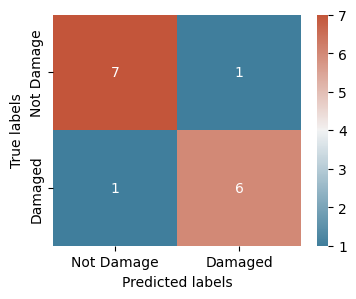

True Positive(TP)  =  6
False Positive(FP) =  1
True Negative(TN)  =  7
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


In [39]:
# initialize the classifier
rfc = RandomForestClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc.fit(X_train_kf, y_train_kf)
    y_pred_kf = rfc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = rfc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7777777777777778
Accuracy on validation set: 0.8636363636363636
Accuracy on validation set: 0.9090909090909091
Mean-Precision: 0.8501683501683502
Accuracy on holdout set: 0.9333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.857     0.923         7

    accuracy                          0.933        15
   macro avg      0.944     0.929     0.932        15
weighted avg      0.941     0.933     0.933        15



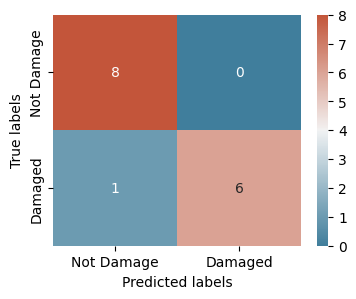

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


In [40]:
# initialize the classifier
svc = SVC(kernel='linear')
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    svc.fit(X_train_kf, y_train_kf)
    y_pred_kf = svc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = svc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_min_max.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

In [41]:
#STOP

# Mean

## 16

In [42]:
df = df_damage_sixteen_mean
X = df.drop(columns=columns)
y = df[["Damage"]]

# split the data into a holdout set and the rest for K-Fold cross-validation
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=training_percent, random_state=42)

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



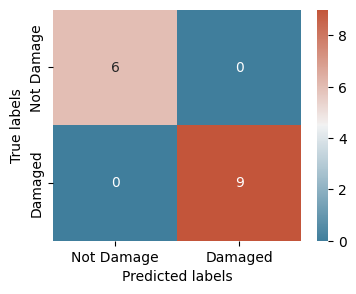

True Positive(TP)  =  9
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [43]:
# initialize the classifier
logistic_regression = LogisticRegression(solver='liblinear', C=25.0, random_state=0)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_regression.fit(X_train_kf, y_train_kf)
    y_pred_kf = logistic_regression.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = logistic_regression.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



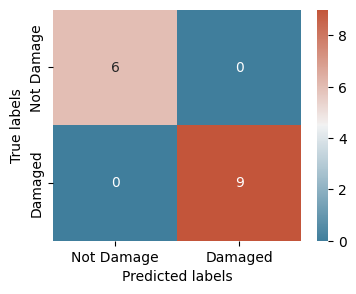

True Positive(TP)  =  9
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [44]:
# initialize the classifier
gaussian_nb = GaussianNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    gaussian_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = gaussian_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = gaussian_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6444444444444445
Accuracy on validation set: 0.7045454545454546
Accuracy on validation set: 0.5909090909090909
Mean-Precision: 0.6466329966329966
Accuracy on holdout set: 0.7333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.750     0.500     0.600         6
           1      0.727     0.889     0.800         9

    accuracy                          0.733        15
   macro avg      0.739     0.694     0.700        15
weighted avg      0.736     0.733     0.720        15



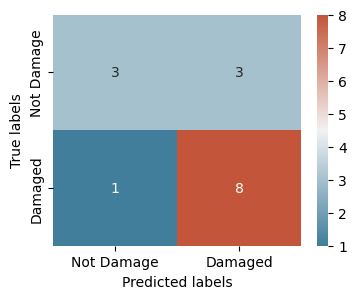

True Positive(TP)  =  8
False Positive(FP) =  3
True Negative(TN)  =  3
False Negative(FN) =  1
Accuracy of the binary classifier = 0.733


In [45]:
# initialize the classifier
multinomial_nb = MultinomialNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    multinomial_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = multinomial_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = multinomial_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.5555555555555556
Accuracy on validation set: 0.6590909090909091
Accuracy on validation set: 0.5909090909090909
Mean-Precision: 0.6018518518518517
Accuracy on holdout set: 0.7333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.600     1.000     0.750         6
           1      1.000     0.556     0.714         9

    accuracy                          0.733        15
   macro avg      0.800     0.778     0.732        15
weighted avg      0.840     0.733     0.729        15



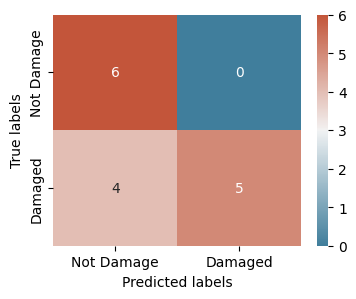

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  4
Accuracy of the binary classifier = 0.733


In [46]:
# initialize the classifier
lda = LinearDiscriminantAnalysis()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    lda.fit(X_train_kf, y_train_kf)
    y_pred_kf = lda.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = lda.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7333333333333333
Accuracy on validation set: 0.6590909090909091
Accuracy on validation set: 0.7272727272727273
Mean-Precision: 0.7065656565656565
Accuracy on holdout set: 0.5333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.462     1.000     0.632         6
           1      1.000     0.222     0.364         9

    accuracy                          0.533        15
   macro avg      0.731     0.611     0.498        15
weighted avg      0.785     0.533     0.471        15



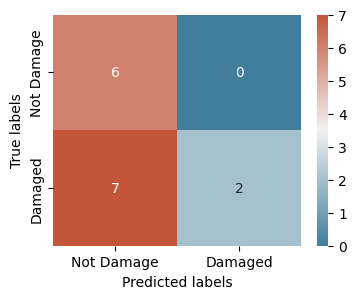

True Positive(TP)  =  2
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  7
Accuracy of the binary classifier = 0.533


In [47]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=1)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6222222222222222
Accuracy on validation set: 0.5909090909090909
Accuracy on validation set: 0.6818181818181818
Mean-Precision: 0.6316498316498316
Accuracy on holdout set: 0.4666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.429     1.000     0.600         6
           1      1.000     0.111     0.200         9

    accuracy                          0.467        15
   macro avg      0.714     0.556     0.400        15
weighted avg      0.771     0.467     0.360        15



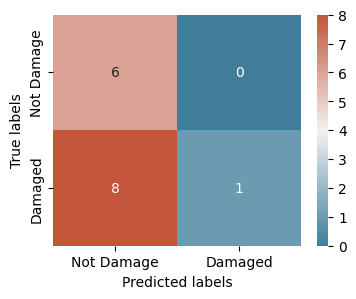

True Positive(TP)  =  1
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  8
Accuracy of the binary classifier = 0.467


In [48]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=2)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.7111111111111111
Accuracy on validation set: 0.6136363636363636
Accuracy on validation set: 0.7045454545454546
Mean-Precision: 0.6764309764309765
Accuracy on holdout set: 0.5333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.462     1.000     0.632         6
           1      1.000     0.222     0.364         9

    accuracy                          0.533        15
   macro avg      0.731     0.611     0.498        15
weighted avg      0.785     0.533     0.471        15



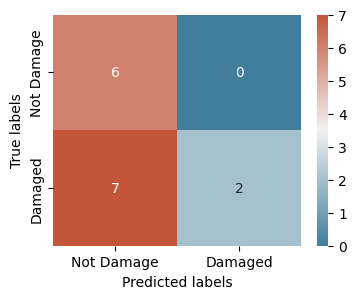

True Positive(TP)  =  2
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  7
Accuracy of the binary classifier = 0.533


In [49]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



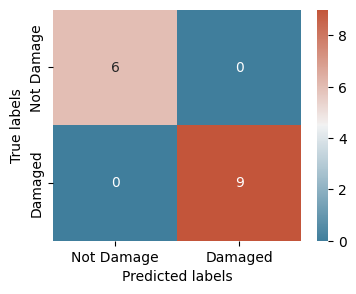

True Positive(TP)  =  9
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [50]:
# initialize the classifier
dtc = DecisionTreeClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    dtc.fit(X_train_kf, y_train_kf)
    y_pred_kf = dtc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = dtc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



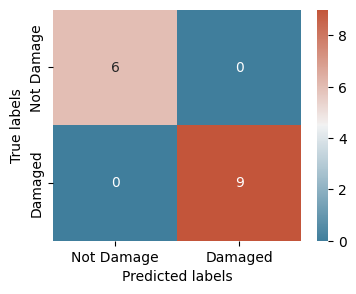

True Positive(TP)  =  9
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [51]:
# initialize the classifier
rfc = RandomForestClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc.fit(X_train_kf, y_train_kf)
    y_pred_kf = rfc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = rfc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



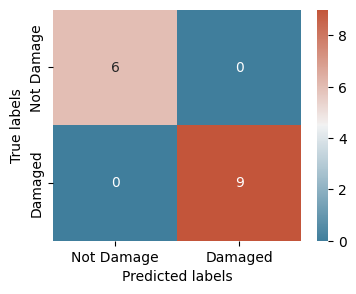

True Positive(TP)  =  9
False Positive(FP) =  0
True Negative(TN)  =  6
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [52]:
# initialize the classifier
svc = SVC(kernel='linear')
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    svc.fit(X_train_kf, y_train_kf)
    y_pred_kf = svc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = svc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_sixteen_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

In [53]:
#STOP

## 32

In [54]:
df = df_damage_thirtytwo_mean
X = df.drop(columns=columns)
y = df[["Damage"]]
results = []
# split the data into a holdout set and the rest for K-Fold cross-validation
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=training_percent, random_state=42)

Accuracy on validation set: 0.9555555555555556
Accuracy on validation set: 0.9772727272727273
Accuracy on validation set: 0.9318181818181818
Mean-Precision: 0.9548821548821548
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        10

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



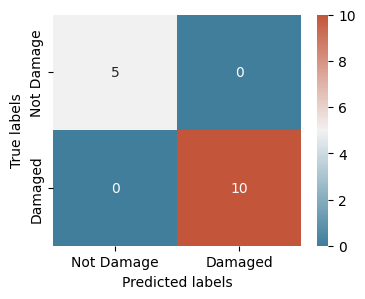

True Positive(TP)  =  10
False Positive(FP) =  0
True Negative(TN)  =  5
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [55]:
# initialize the classifier
logistic_regression = LogisticRegression(solver='liblinear', C=25.0, random_state=0)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_regression.fit(X_train_kf, y_train_kf)
    y_pred_kf = logistic_regression.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = logistic_regression.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        10

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



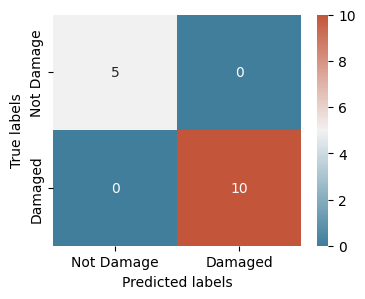

True Positive(TP)  =  10
False Positive(FP) =  0
True Negative(TN)  =  5
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [56]:
# initialize the classifier
gaussian_nb = GaussianNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    gaussian_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = gaussian_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = gaussian_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6888888888888889
Accuracy on validation set: 0.6818181818181818
Accuracy on validation set: 0.6818181818181818
Mean-Precision: 0.6841750841750841
Accuracy on holdout set: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0      0.500     0.400     0.444         5
           1      0.727     0.800     0.762        10

    accuracy                          0.667        15
   macro avg      0.614     0.600     0.603        15
weighted avg      0.652     0.667     0.656        15



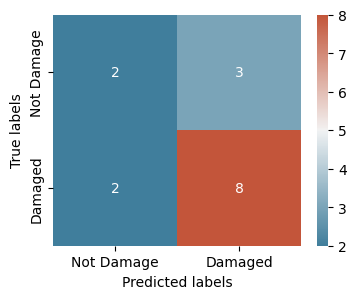

True Positive(TP)  =  8
False Positive(FP) =  3
True Negative(TN)  =  2
False Negative(FN) =  2
Accuracy of the binary classifier = 0.667


In [57]:
# initialize the classifier
multinomial_nb = MultinomialNB()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    multinomial_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = multinomial_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = multinomial_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.5555555555555556
Accuracy on validation set: 0.5681818181818182
Accuracy on validation set: 0.5
Mean-Precision: 0.5412457912457912
Accuracy on holdout set: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0      0.500     0.400     0.444         5
           1      0.727     0.800     0.762        10

    accuracy                          0.667        15
   macro avg      0.614     0.600     0.603        15
weighted avg      0.652     0.667     0.656        15



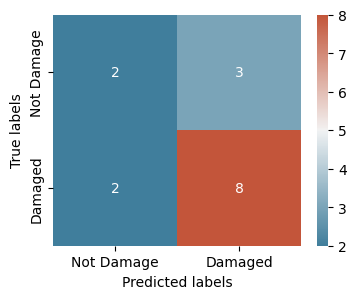

True Positive(TP)  =  8
False Positive(FP) =  3
True Negative(TN)  =  2
False Negative(FN) =  2
Accuracy of the binary classifier = 0.667


In [58]:
# initialize the classifier
lda = LinearDiscriminantAnalysis()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    lda.fit(X_train_kf, y_train_kf)
    y_pred_kf = lda.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = lda.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6444444444444445
Accuracy on validation set: 0.5
Accuracy on validation set: 0.5227272727272727
Mean-Precision: 0.5557239057239057
Accuracy on holdout set: 0.5333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.375     0.600     0.462         5
           1      0.714     0.500     0.588        10

    accuracy                          0.533        15
   macro avg      0.545     0.550     0.525        15
weighted avg      0.601     0.533     0.546        15



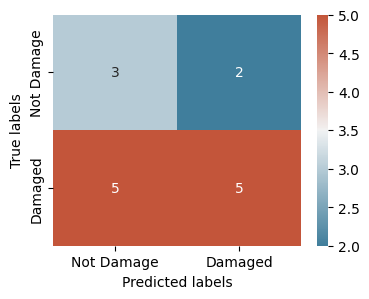

True Positive(TP)  =  5
False Positive(FP) =  2
True Negative(TN)  =  3
False Negative(FN) =  5
Accuracy of the binary classifier = 0.533


In [59]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=1)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6222222222222222
Accuracy on validation set: 0.5
Accuracy on validation set: 0.6363636363636364
Mean-Precision: 0.5861952861952862
Accuracy on holdout set: 0.3333333333333333

Classification Report:

              precision    recall  f1-score   support

           0      0.308     0.800     0.444         5
           1      0.500     0.100     0.167        10

    accuracy                          0.333        15
   macro avg      0.404     0.450     0.306        15
weighted avg      0.436     0.333     0.259        15



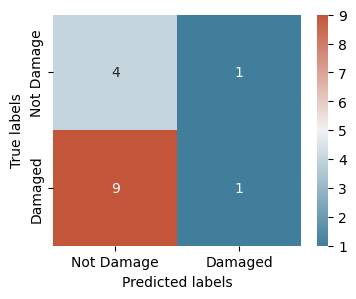

True Positive(TP)  =  1
False Positive(FP) =  1
True Negative(TN)  =  4
False Negative(FN) =  9
Accuracy of the binary classifier = 0.333


In [60]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=2)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.6888888888888889
Accuracy on validation set: 0.5
Accuracy on validation set: 0.6136363636363636
Mean-Precision: 0.6008417508417508
Accuracy on holdout set: 0.4666666666666667

Classification Report:

              precision    recall  f1-score   support

           0      0.333     0.600     0.429         5
           1      0.667     0.400     0.500        10

    accuracy                          0.467        15
   macro avg      0.500     0.500     0.464        15
weighted avg      0.556     0.467     0.476        15



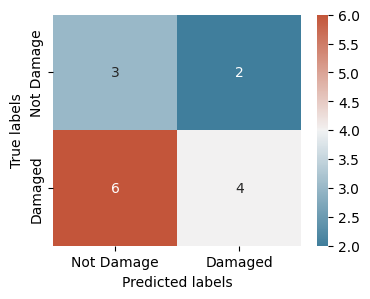

True Positive(TP)  =  4
False Positive(FP) =  2
True Negative(TN)  =  3
False Negative(FN) =  6
Accuracy of the binary classifier = 0.467


In [61]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        10

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



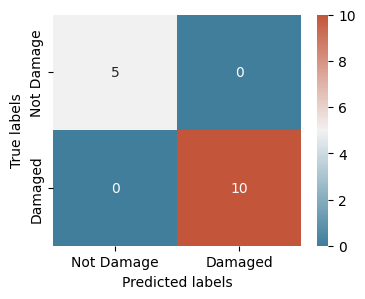

True Positive(TP)  =  10
False Positive(FP) =  0
True Negative(TN)  =  5
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [62]:
# initialize the classifier
dtc = DecisionTreeClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    dtc.fit(X_train_kf, y_train_kf)
    y_pred_kf = dtc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = dtc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 0.9777777777777777
Accuracy on validation set: 0.9545454545454546
Accuracy on validation set: 1.0
Mean-Precision: 0.9774410774410774
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        10

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



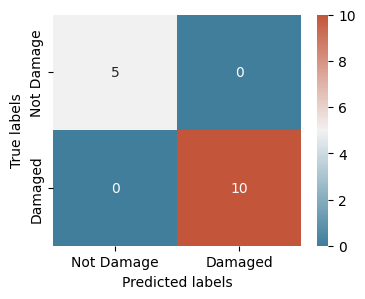

True Positive(TP)  =  10
False Positive(FP) =  0
True Negative(TN)  =  5
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [63]:
# initialize the classifier
rfc = RandomForestClassifier()
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc.fit(X_train_kf, y_train_kf)
    y_pred_kf = rfc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = rfc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Accuracy on validation set: 1.0
Mean-Precision: 1.0
Accuracy on holdout set: 1.0

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        10

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



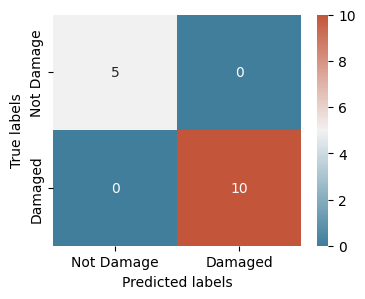

True Positive(TP)  =  10
False Positive(FP) =  0
True Negative(TN)  =  5
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


In [64]:
# initialize the classifier
svc = SVC(kernel='linear')
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    svc.fit(X_train_kf, y_train_kf)
    y_pred_kf = svc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf}")

#print("results",results)
print(f"Mean-Precision: {sum(results) / len(results)}")

y_pred_holdout = svc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
accuracy_thirtytwo_mean.append(round(accuracy_holdout, 2))
print(f"Accuracy on holdout set: {accuracy_holdout}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

In [65]:
#STOP

# Performance

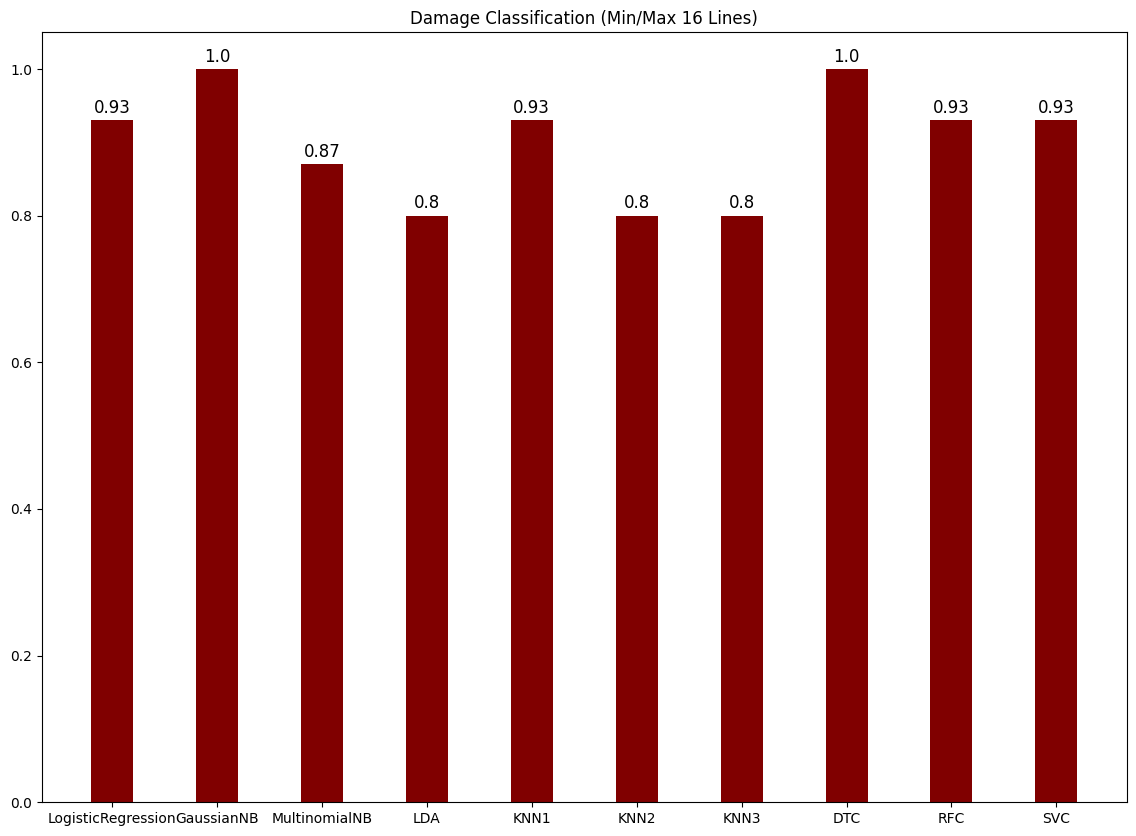

In [66]:
data = {'LogisticRegression':accuracy_sixteen_min_max[0], 'GaussianNB':accuracy_sixteen_min_max[1],
        'MultinomialNB':accuracy_sixteen_min_max[2], 'LDA':accuracy_sixteen_min_max[3],
        'KNN1':accuracy_sixteen_min_max[4], 'KNN2':accuracy_thirtytwo_min_max[5], 'KNN3':accuracy_thirtytwo_min_max[6],
        'DTC':accuracy_sixteen_min_max[7], 'RFC':accuracy_sixteen_min_max[8], 'SVC':accuracy_sixteen_min_max[9]}

plot_accuracy("Damage Classification (Min/Max 16 Lines)", data)

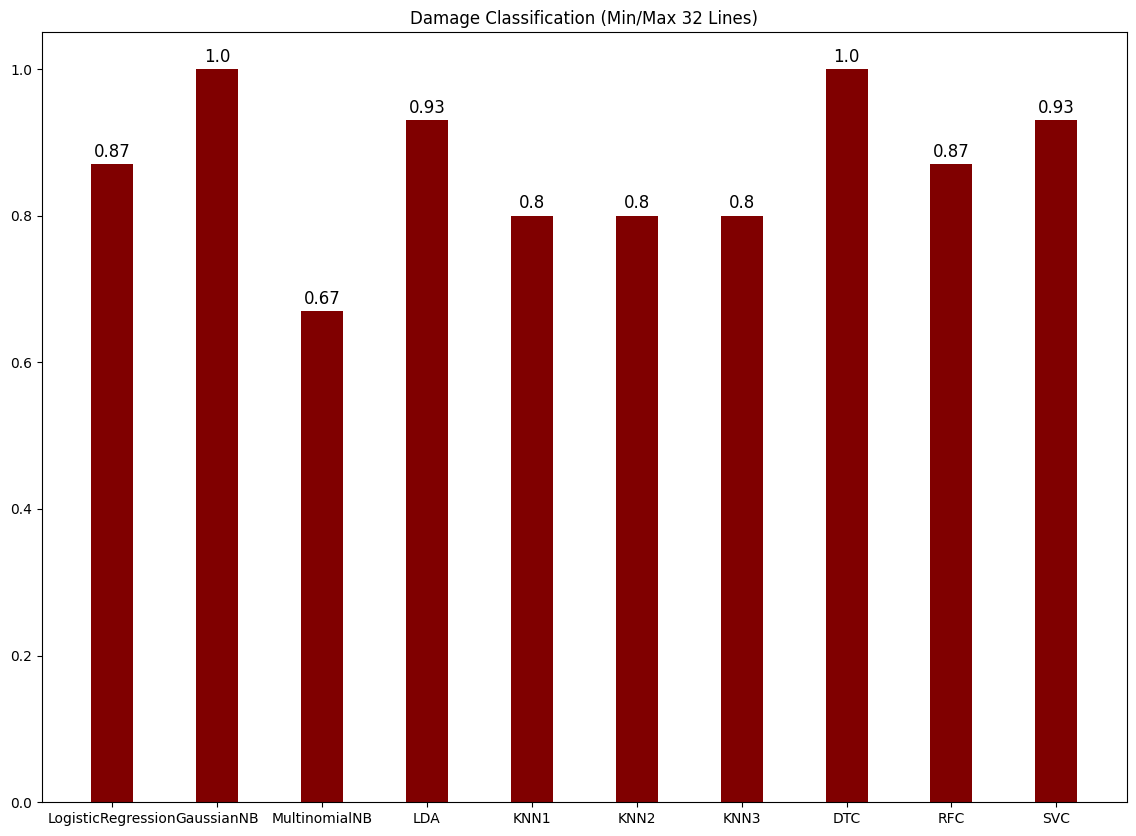

In [67]:
data = {'LogisticRegression':accuracy_thirtytwo_min_max[0], 'GaussianNB':accuracy_thirtytwo_min_max[1],
        'MultinomialNB':accuracy_thirtytwo_min_max[2], 'LDA':accuracy_thirtytwo_min_max[3],
        'KNN1':accuracy_thirtytwo_min_max[4], 'KNN2':accuracy_thirtytwo_min_max[5], 'KNN3':accuracy_thirtytwo_min_max[6],
        'DTC':accuracy_thirtytwo_min_max[7], 'RFC':accuracy_thirtytwo_min_max[8], 'SVC':accuracy_thirtytwo_min_max[9]}

plot_accuracy("Damage Classification (Min/Max 32 Lines)", data)

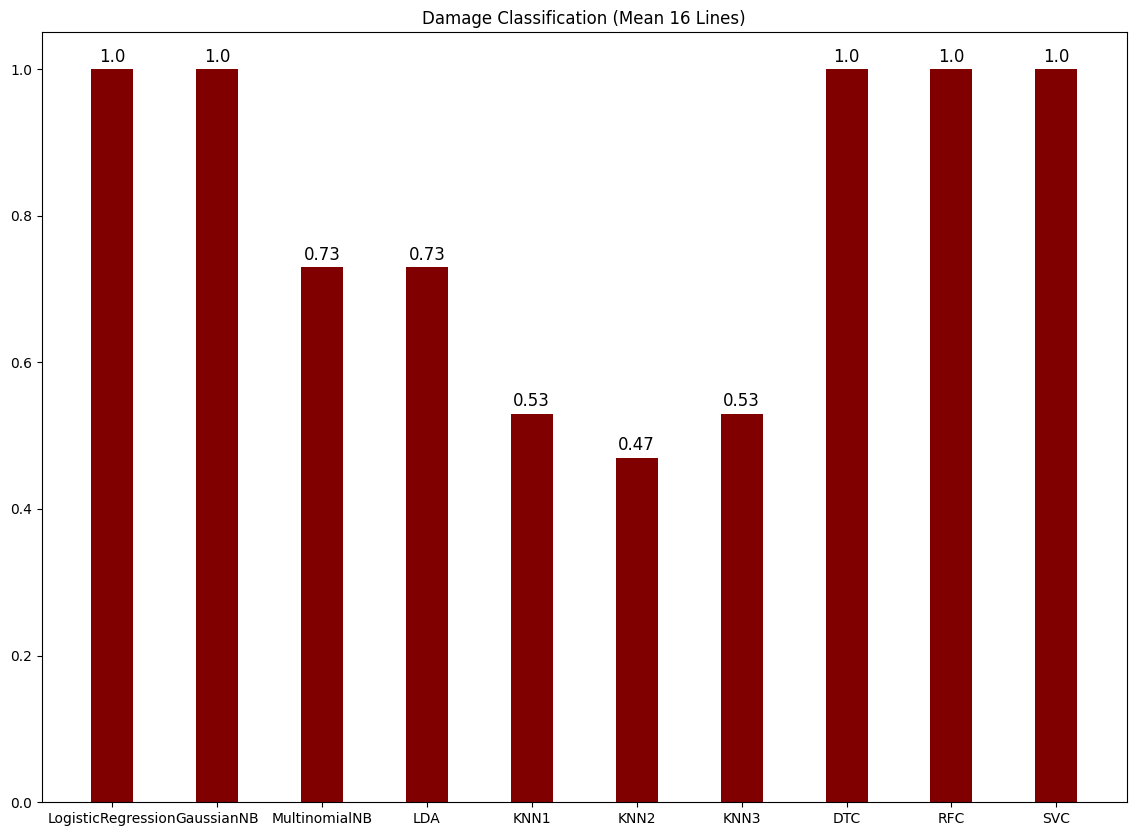

In [68]:
data = {'LogisticRegression':accuracy_sixteen_mean[0], 'GaussianNB':accuracy_sixteen_mean[1],
        'MultinomialNB':accuracy_sixteen_mean[2], 'LDA':accuracy_sixteen_mean[3],
        'KNN1':accuracy_sixteen_mean[4], 'KNN2':accuracy_sixteen_mean[5], 'KNN3':accuracy_sixteen_mean[6],
        'DTC':accuracy_sixteen_mean[7], 'RFC':accuracy_sixteen_mean[8], 'SVC':accuracy_sixteen_mean[9]}

plot_accuracy("Damage Classification (Mean 16 Lines)", data)

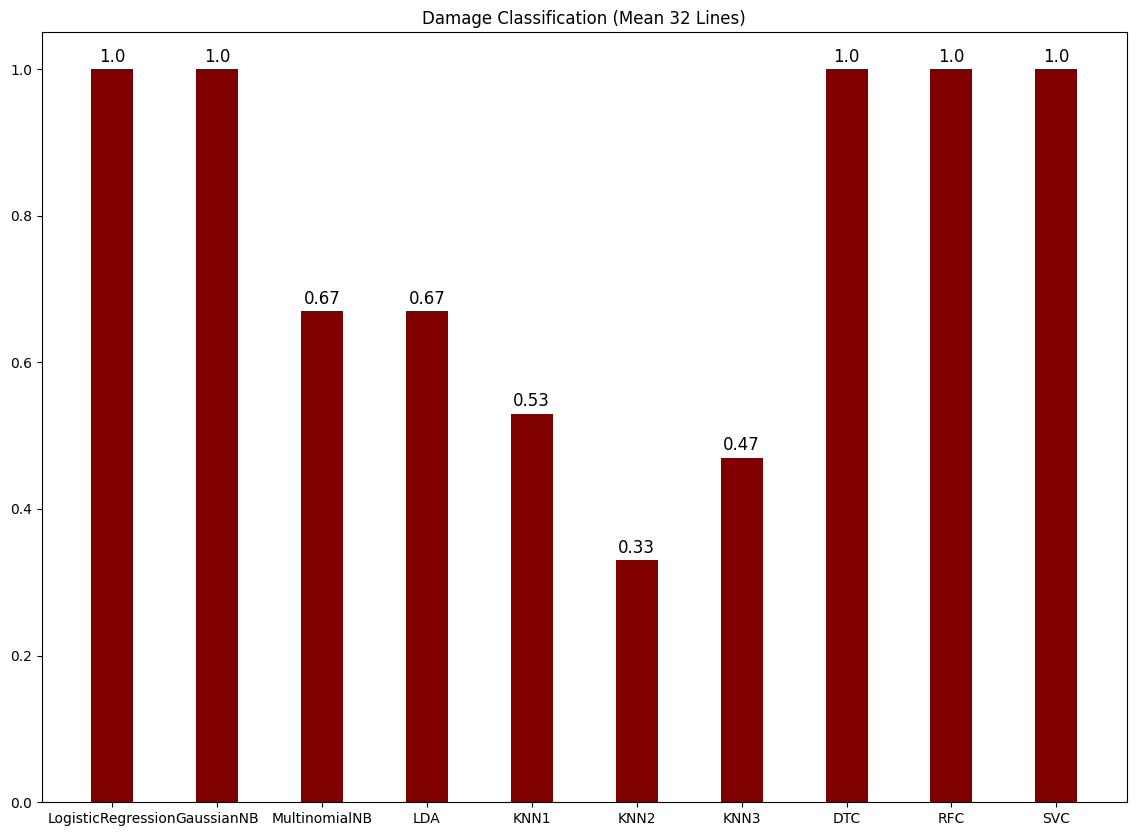

In [69]:
data = {'LogisticRegression':accuracy_thirtytwo_mean[0], 'GaussianNB':accuracy_thirtytwo_mean[1],
        'MultinomialNB':accuracy_thirtytwo_mean[2], 'LDA':accuracy_thirtytwo_mean[3],
        'KNN1':accuracy_thirtytwo_mean[4], 'KNN2':accuracy_thirtytwo_mean[5], 'KNN3':accuracy_thirtytwo_mean[6],
        'DTC':accuracy_thirtytwo_mean[7], 'RFC':accuracy_thirtytwo_mean[8], 'SVC':accuracy_thirtytwo_mean[9]}

plot_accuracy("Damage Classification (Mean 32 Lines)", data)

In [70]:
#STOP